# Question 1
Using the dataset (https://www.kaggle.com/raddar/nodules-in-chest-xrays-jsrt) file name is jsrt_metadata.csv:
1. Find the total number of patients of each disease (diagnosis) and plot in histogram.
2. Find the total number of patients of each disease (diagnosis) with respect to the disease state(malignant or benign) and
plot in a pie chart.
3. Find and plot via pia chart the total number of patients of each disease (diagnosis) with respect to the gender(Female,
Male)


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("jsrt_metadata.csv",header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9
0,JPCLN001.png,5.0,15.0,53,Male,1634.0,692.0,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.0,30.0,78,Female,1614.0,1090.0,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.0,30.0,63,Female,1303.0,447.0,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.0,14.0,68,Female,606.0,836.0,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.0,35.0,73,Female,1438.0,692.0,malignant,l.upper lobe(S3),lung cancer


In [36]:
headers = ["study_id","subtlety","size","age","gender","x","y","state","position","diagnosis"]

In [37]:
df.columns=headers


In [38]:
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.0,15.0,53,Male,1634.0,692.0,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.0,30.0,78,Female,1614.0,1090.0,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.0,30.0,63,Female,1303.0,447.0,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.0,14.0,68,Female,606.0,836.0,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.0,35.0,73,Female,1438.0,692.0,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,NaN,NaN,50,Male,NaN,NaN,non-nodule,NaN,NaN
243,JPCNN090.png,NaN,NaN,68,Female,NaN,NaN,non-nodule,NaN,NaN
244,JPCNN091.png,NaN,NaN,81,Male,NaN,NaN,non-nodule,NaN,NaN
245,JPCNN092.png,NaN,NaN,70,Female,NaN,NaN,non-nodule,NaN,NaN


In [39]:
df.isnull().sum()

study_id      0
subtlety     93
size         93
age           0
gender        0
x            93
y            93
state         0
position     93
diagnosis    93
dtype: int64

In [40]:
m=df['subtlety'].astype('float').mean()
df['subtlety'].replace(np.nan,m,inplace=True)
m=df['size'].astype('float').mean()
df['size'].replace(np.nan,m,inplace=True)
m=df['x'].astype('float').mean()
df['x'].replace(np.nan,m,inplace=True)
m=df['y'].astype('float').mean()
df['y'].replace(np.nan,m,inplace=True)

In [41]:
df.isnull().sum()

study_id      0
subtlety      0
size          0
age           0
gender        0
x             0
y             0
state         0
position     93
diagnosis    93
dtype: int64

In [42]:
mx=df['position'].value_counts().idxmax()
df['position'].replace(np.nan,mx,inplace=True)
mx=df['diagnosis'].value_counts().idxmax()
df['diagnosis'].replace(np.nan,mx,inplace=True)

In [43]:
df.isnull().sum()

study_id     0
subtlety     0
size         0
age          0
gender       0
x            0
y            0
state        0
position     0
diagnosis    0
dtype: int64

In [44]:
num = df['diagnosis'].value_counts()
num

lung cancer                                       149
lung cancer(adenocarcinoma)                        23
tuberculoma                                        14
granuloma                                           8
lung cancer(bronchioloalveolar cell carcinoma)      7
unknown                                             4
metastasis of colon cancer                          4
inflammatory mass                                   4
pulmonary tuberculosis                              3
lung abscess                                        2
Cryptococcosis                                      2
lung cancer(squamous cell carcinoma)                2
Inflammatory mass                                   2
pulmonary hematoma                                  2
susp. inflammatory mass                             2
hamartoma                                           2
sclerosing hemangioma                               2
lung cancer(large cell carcinoma)                   1
susp. hamartoma             

(array([23.,  1.,  3.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.  ,   2.48,   3.96,   5.44,   6.92,   8.4 ,   9.88,  11.36,
         12.84,  14.32,  15.8 ,  17.28,  18.76,  20.24,  21.72,  23.2 ,
         24.68,  26.16,  27.64,  29.12,  30.6 ,  32.08,  33.56,  35.04,
         36.52,  38.  ,  39.48,  40.96,  42.44,  43.92,  45.4 ,  46.88,
         48.36,  49.84,  51.32,  52.8 ,  54.28,  55.76,  57.24,  58.72,
         60.2 ,  61.68,  63.16,  64.64,  66.12,  67.6 ,  69.08,  70.56,
  

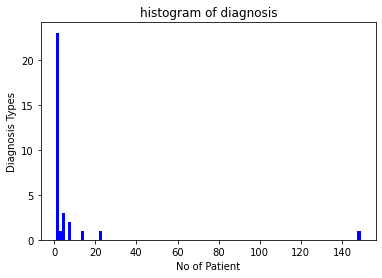

In [45]:
plt.title('histogram of diagnosis')
plt.xlabel('No of Patient')
plt.ylabel('Diagnosis Types')
plt.hist(num,bins=100,facecolor='blue')

Text(0.5, 1.0, 'Diagnosis with respect to state')

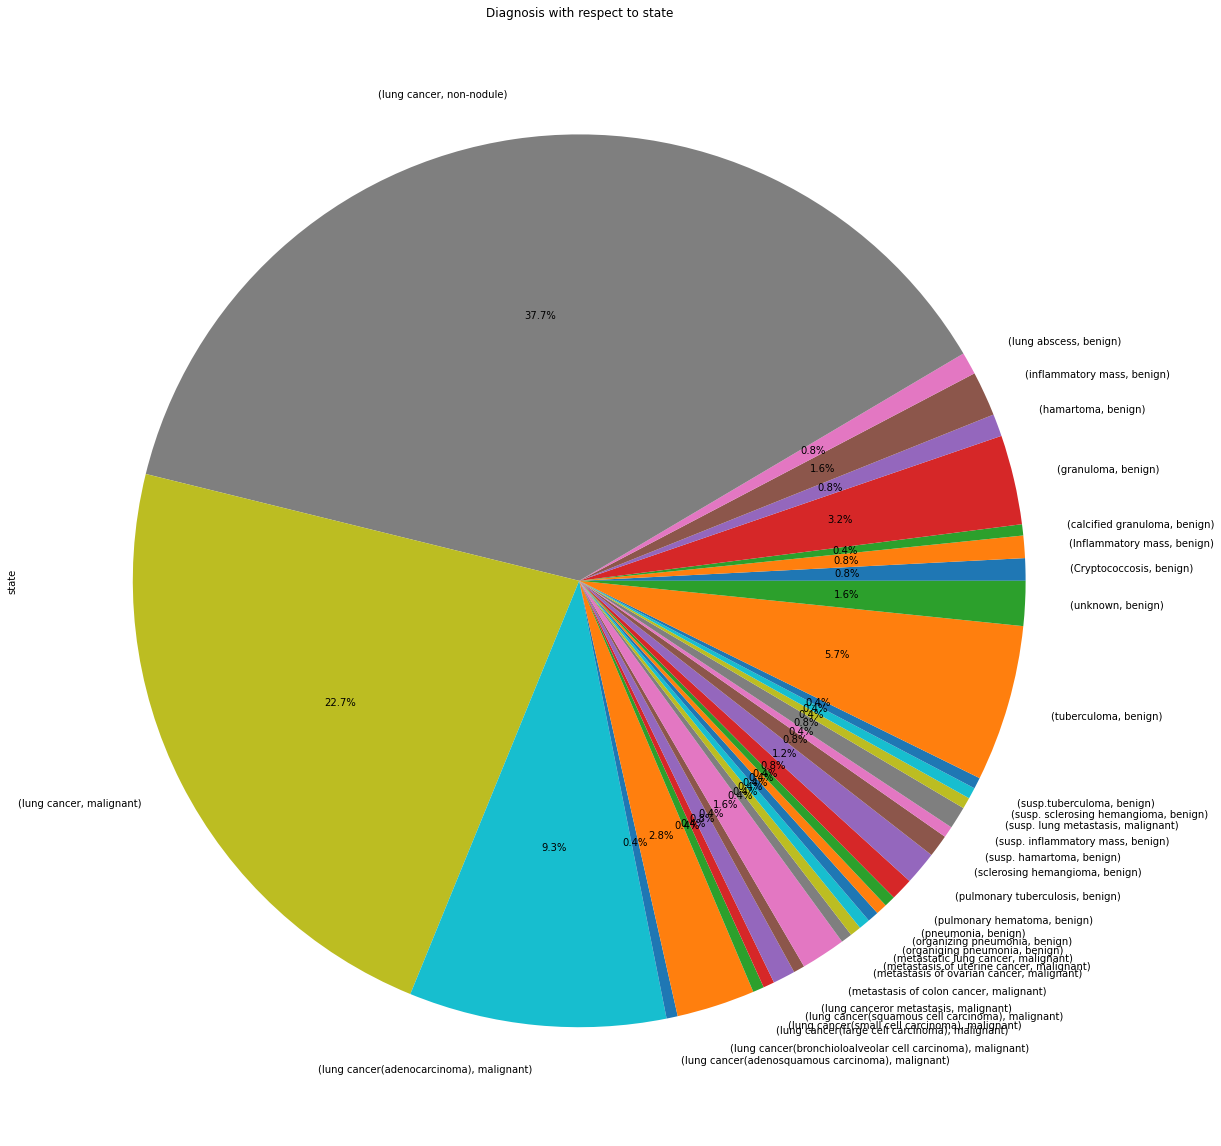

In [46]:

x = df.groupby('diagnosis')['state'].value_counts()
x.plot.pie( subplots=True, figsize=(20,600),autopct='%1.1f%%')
plt.title('Diagnosis with respect to state')


Text(0.5, 1.0, 'Diagnosis with respect to gender')

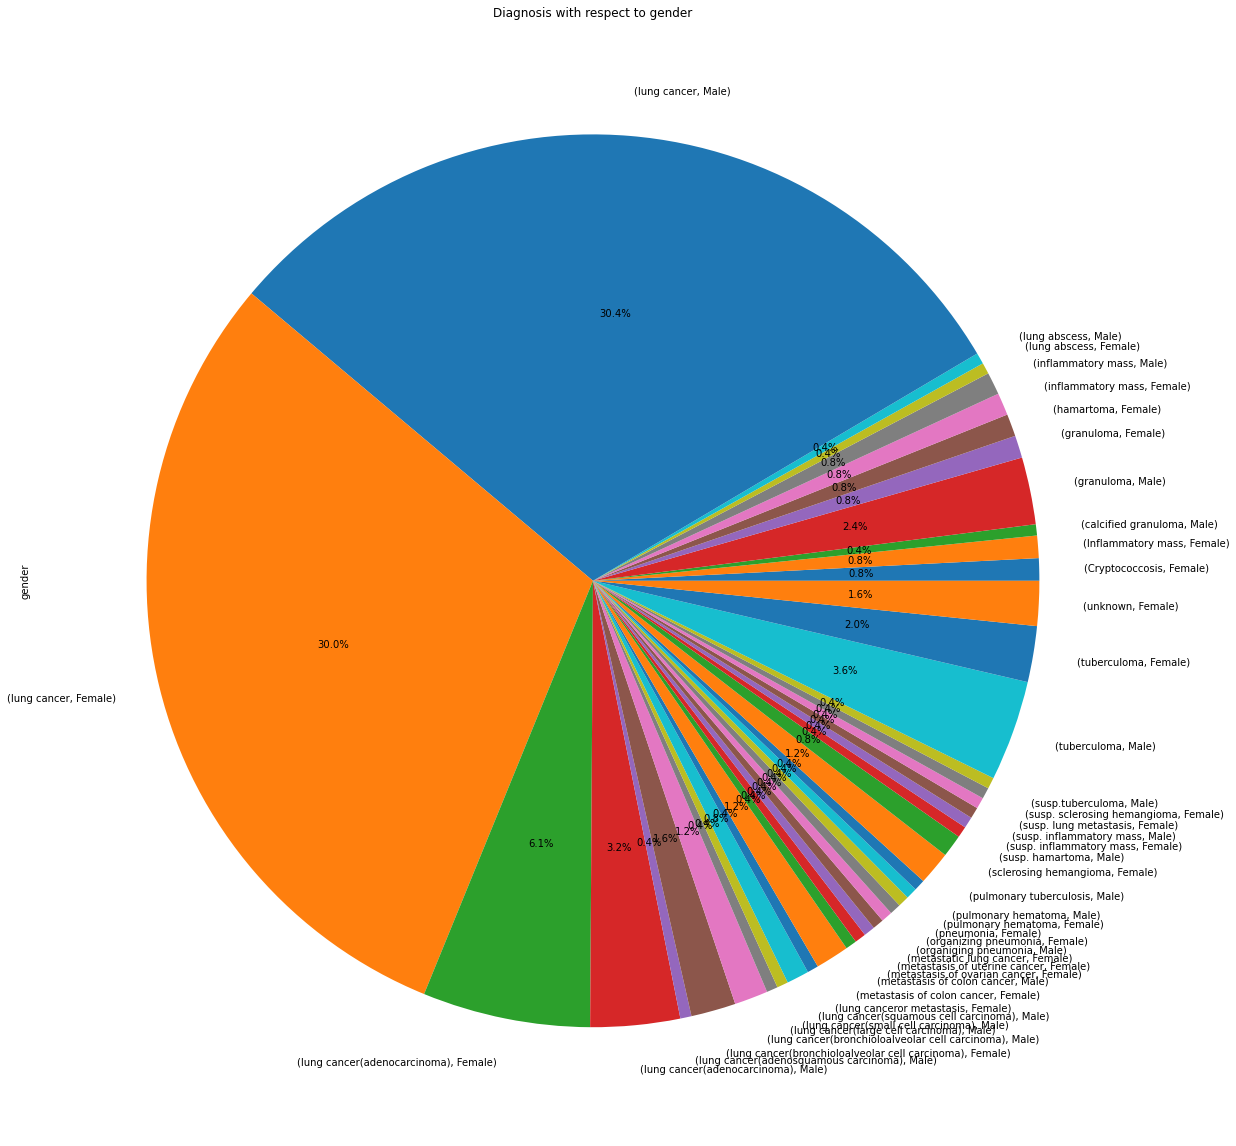

In [47]:
x = df.groupby('diagnosis')['gender'].value_counts()
x.plot.pie( subplots=True, figsize=(20,600),autopct='%1.1f%%')
plt.title('Diagnosis with respect to gender')